In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import gc
import pickle
import workers

In [2]:
df = workers.dataReader()

In [3]:
xtrain_30, xval_30, xtest_30, ytrain_30, yval_30, ytest_30, feature_scaler_30, target_scaler_30= workers.create_sequences_3(df,30,)

In [4]:
xtrain_50, xval_50, xtest_50, ytrain_50, yval_50, ytest_50, feature_scaler_50, target_scaler_50= workers.create_sequences_3(df,50,)

In [5]:
model50 = tf.keras.models.load_model('models/model_winLen50.keras')
model30 = tf.keras.models.load_model('models/model_winLen30.keras')

In [6]:
rmse,mae = workers.evaluate_model(xtrain_30,xtrain_50,ytrain_30,ytrain_50,model_1=model30,model_2=model50,target_scaler_1=target_scaler_30,target_scaler_2=target_scaler_50)

In [7]:
print(f"{rmse:.2f}&{mae:.2f}")

5.32&3.93


In [8]:
ypred_30  = model30.predict(xtest_30)
ypred_50 = model50.predict(xtest_50)

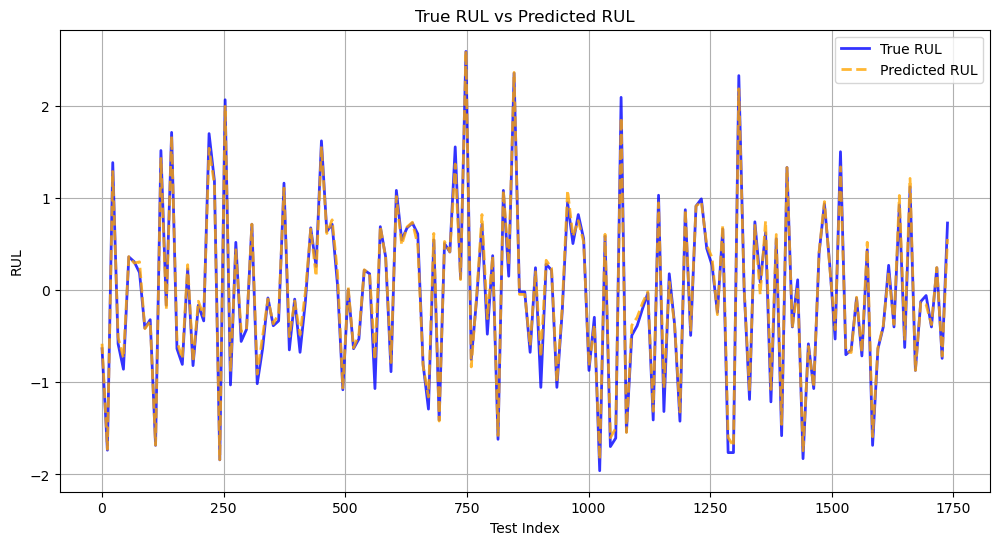

In [12]:
workers.plot_rul_line(ytest_30, ypred_30,max_points=150)

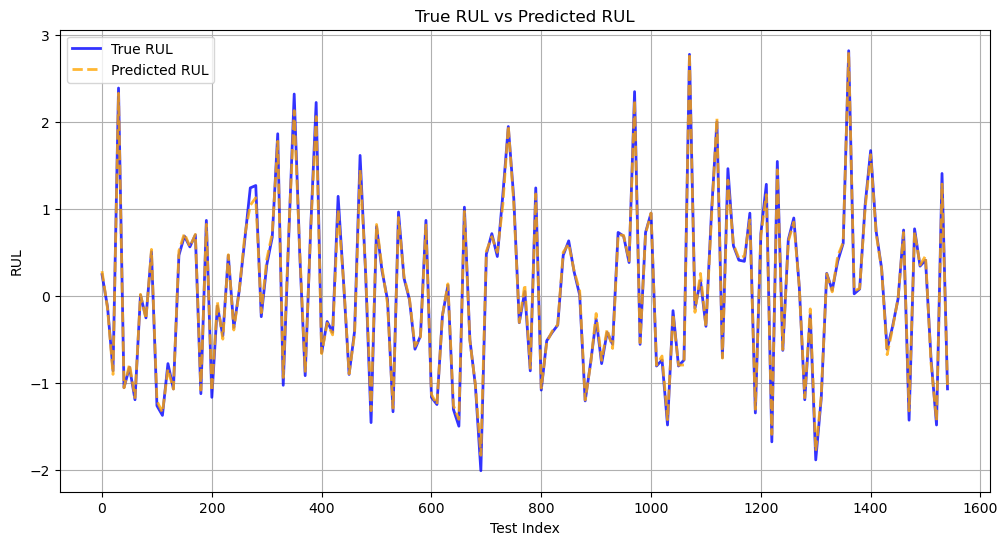

In [13]:
workers.plot_rul_line(ytest_50, ypred_50,max_points=150)